### Lab 6: Confidence Intervals

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

#### Problem 1
To simulate the data from the LHC lab from last week, we will create a Poisson background with $\lambda = 100$ and find the $5\sigma$ sensitivity threshold.

In [6]:
#Create Background
np.random.seed(11212020)
mu = 100
bg = stats.poisson.rvs(mu=mu, size=100000)

#Find x sigma measurement
xsig = 5
p_5sig = stats.norm.cdf(sig)
mSig = stats.poisson.ppf(p_5sig, mu)

print(xsig, "sigma sensitivity threshold is", mSig, "events")

5 sigma sensitivity threshold is 154.0 events


#### Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30 $\sigma$ range. Inject this signal into your background data many times.

We'll let our signal be 300 events, and inject that signal into our background 5000 times.

In [67]:
#Find sigma of 300 events
events = 300
mP = stats.poisson.sf(events,mu)
sigma = stats.norm.isf(mP)
print('The probability of measuring', events, 'events is', mP, 'which corresponds to a', sigma, 'sigma event')

#Generating 5000 events and injecting into the background
signal = 300 + stats.poisson.rvs(mu, size=3000)
data = np.append(signal,bg)

The probability of measuring 300 events is 6.03239161500574e-59 which corresponds to a 16.146265816275307 sigma event


##### 2a) Create a histogram of how bright the observed signal appears to be and discuss its shape.

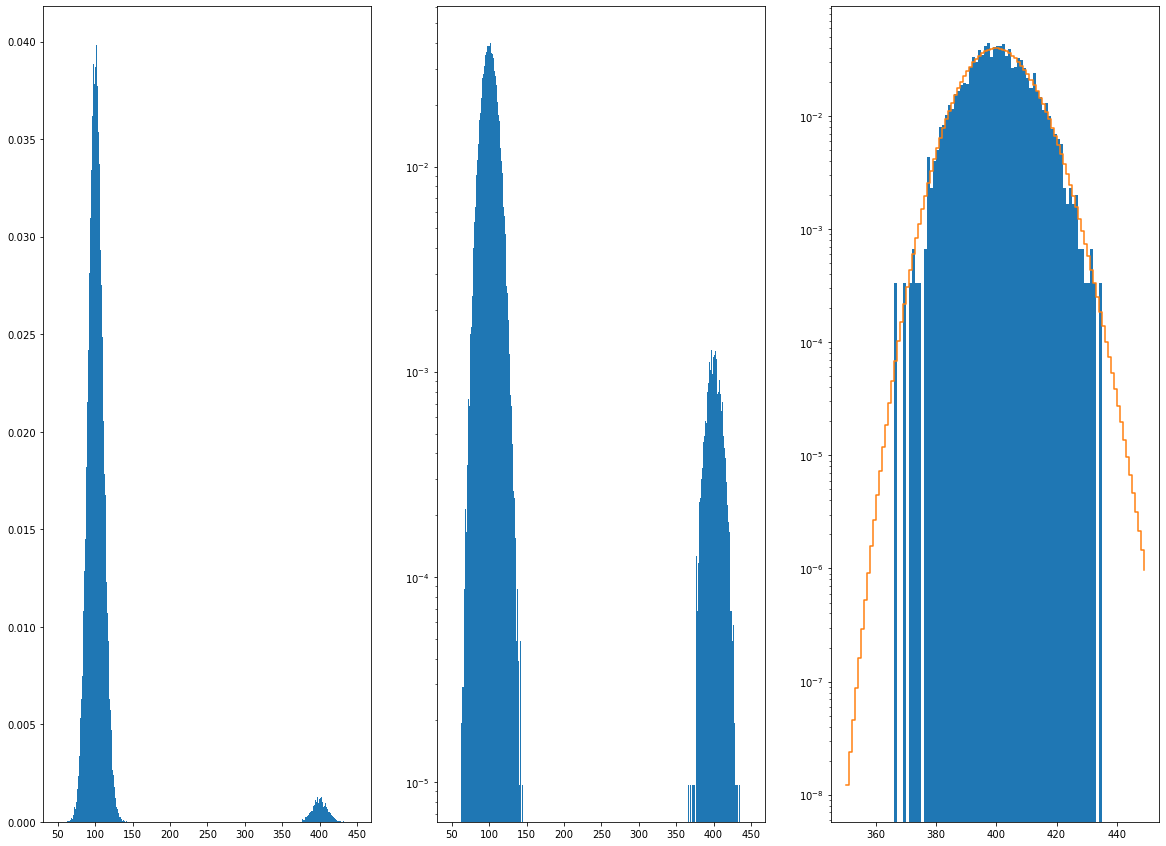

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.hist(data,bins = range(50,450),density = True)
ax2.hist(data,bins = range(50,450),density = True)
ax2.set_yscale('log')
signal_hist = ax3.hist(signal,bins = range(350,450),density = True)
ax3.set_yscale('log')
x2 = range(350,450)
ax3.step(x2,stats.poisson.pmf(x2,100,loc=300),where = 'post')
plt.show()

The signal is clearly much brighter than the background, and also appears to be poisson distributed. As the signal is poisson distributed with the same lambda as the background (see the far right graph, which is zoomed in on the signal and has an orange line which corresponds to a poisson distribution with lambda = 100) this tells us that the actual distribution of the signal has little to no variance, and that the variance in our observed signal is entirely due to the variance in the background.

##### b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is displaced (ie. the real signal is 300, the observed signal is poisson distributed about 400), this can be accounted for the fact that we detect background effects as well as the real signal. Otherwise, the signal appears entirely symmetric, and if we account for the displacement, it seems that the signal is unbiased.

In [22]:
print('Probability the real value is less than the observed value: ', stats.poisson.cdf(400,100,loc = 300))
print('Probability the real value is greater than the observed value: ', stats.poisson.sf(400,100,loc = 300))

Probability the real value is less than the observed value:  0.5265621985299985
Probability the real value is greater than the observed value:  0.47343780147000153


#### Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above $5\sigma$ ($30\sigma$ or more). You will want to follow the work you did for Homework 5 very closely.

In [52]:
#Finding 30 sigma
s=0
events=100
maxSig = 30
while s < maxSig:
    sp = stats.poisson.sf(events,100)
    s = stats.norm.isf(sp)
    if(s < 30):
        events +=1
print("Number of events at", maxSig,"sigma:", c)

Number of events at 30 sigma: 527


In [42]:
signal2 = stats.randint.rvs(100,527,size = 1000000) #Creating 1,000,000 uniformly distributed signals between 0 and 30 sigma
data2 = signal2 + stats.poisson.rvs(100, size = 1000000) #Injecting into the background
print(np.max(data2),np.min(data2)) #Used to find edges of 2d histogram
print(np.max(signal2),np.min(signal2))

669 166
526 100


##### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data
We will inject 1,000,000 uniformly distributed signals into our observed data with a range from 0$\sigma$ to 30$\sigma$. This simulates many signals which are as likely to be faint as they are to be bright - such as stars in the night sky for example.

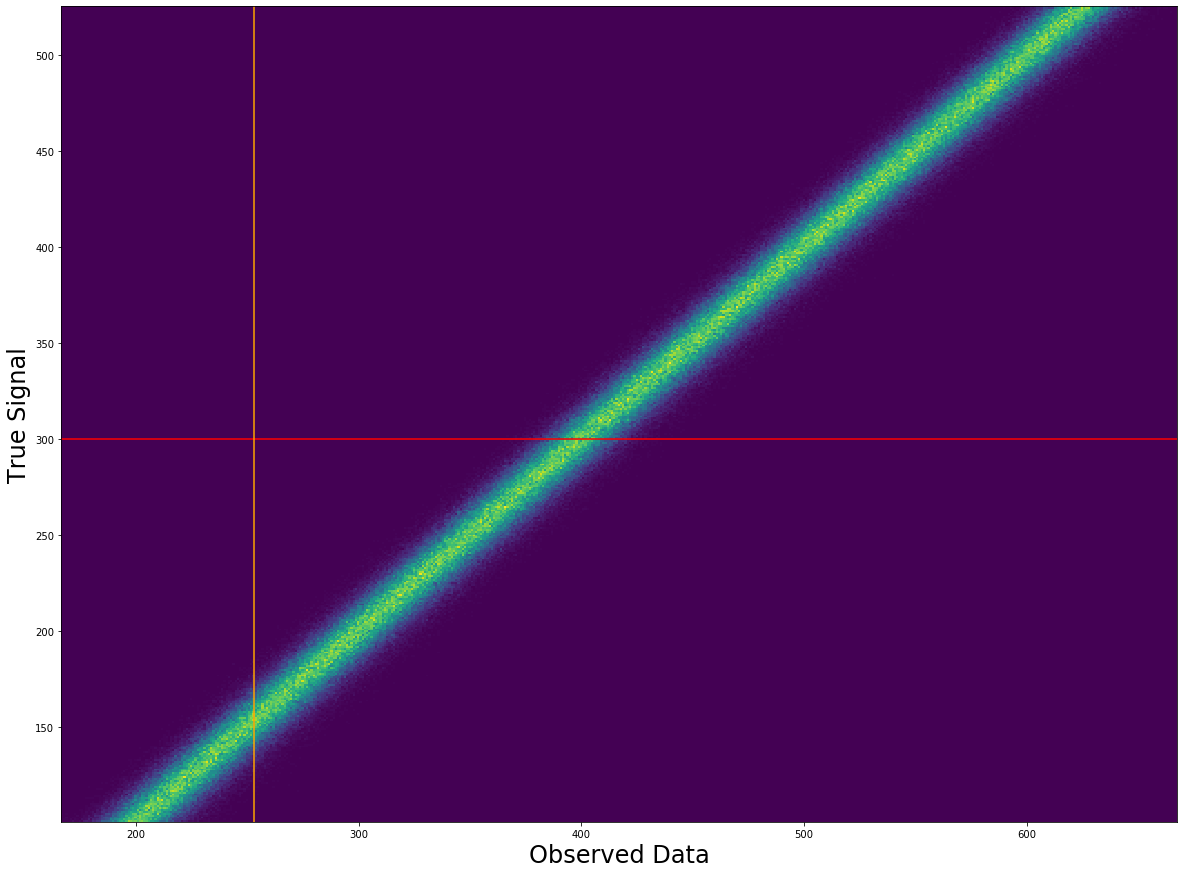

In [49]:
sedge = np.array(range(100,527))
dedge = np.array(range(166,669))

Psd, temp, temp2 = np.histogram2d(np.array(data2),np.array(signal2), bins=[dedge,sedge], density=True)

dcenters = (dedge[:-1]+dedge[1:])/2
scenters = (sedge[:-1]+sedge[1:])/2

plt.pcolormesh(dcenters,scenters,Psd.T)
plt.ylabel('True Signal', fontsize=24)
plt.xlabel('Observed Data', fontsize=24)

plt.axhline(sedge[200],color = 'red')
plt.axvline(dedge[87],color = 'orange')

plt.show()

#### b) For the same injected signal power as in problem 2, show that you get the same answer.
As we can see from the plot below, we get the same answer as in part 2.

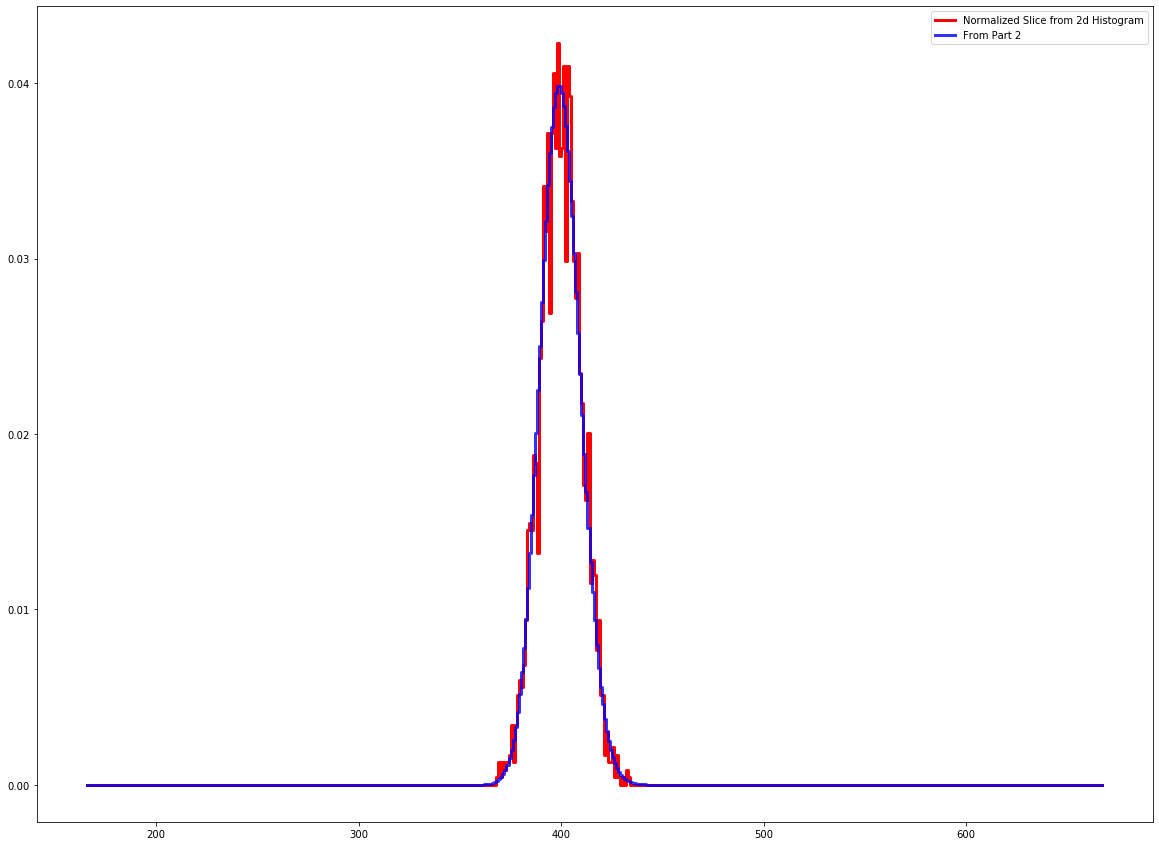

In [50]:
plt.step(temp[:-1],Psd[:,200]/np.sum(Psd[:,200]),Linewidth = 3, color = 'red',label = 'Normalized Slice from 2d Histogram')
plt.step(temp[:-1],stats.poisson.pmf(temp[:-1],100,loc=300),Linewidth = 3,alpha = 0.8,color = 'blue', label = 'From Part 2')
plt.legend()
plt.show()

#### c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5$\sigma$) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

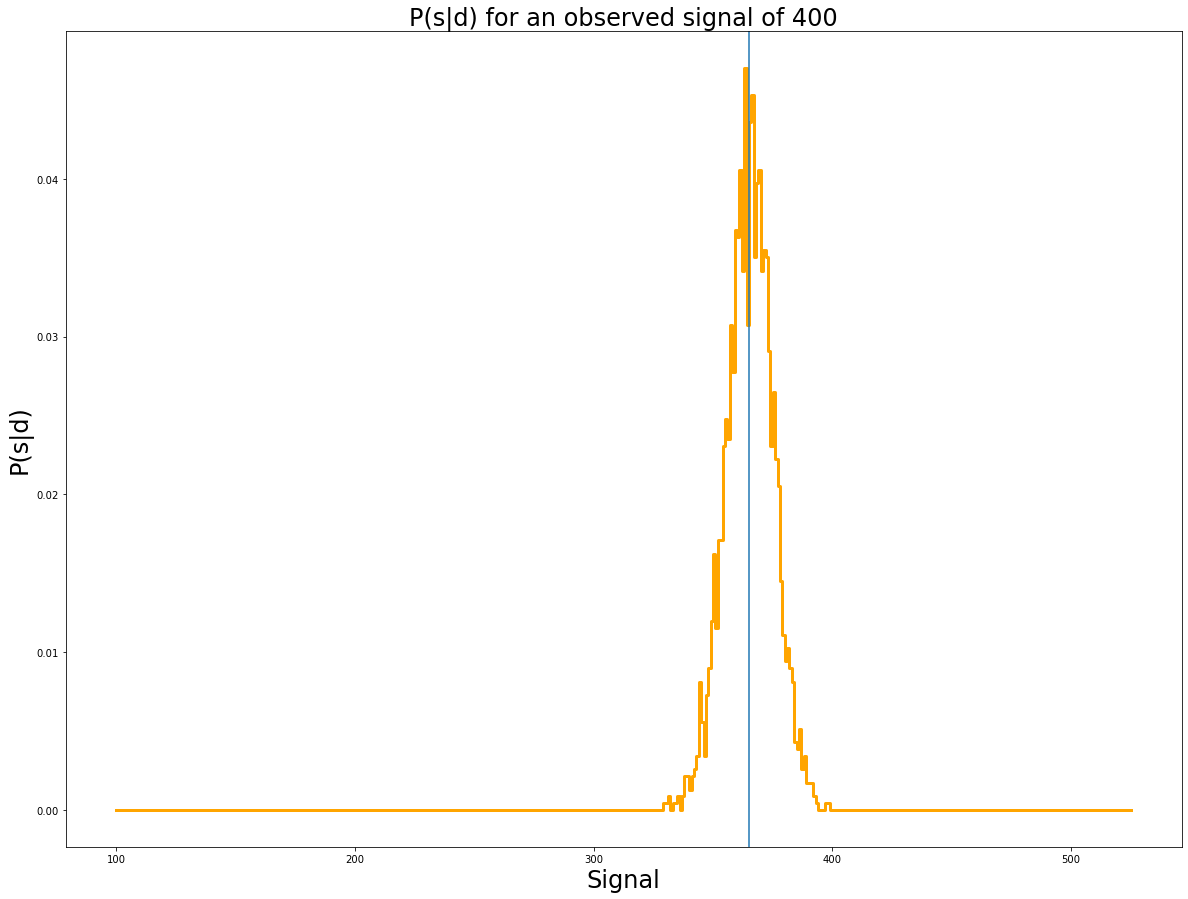

In [80]:
n = 300
plt.step(temp2[:-1],Psd[n,:]/np.sum(Psd[n,:]),Linewidth = 3, color = 'orange')
plt.title('P(s|d) for an observed signal of ' + str(temp2[n]) ,fontsize = 24)
plt.xlabel('Signal',fontsize = 24)
plt.ylabel('P(s|d)', fontsize=24)
plt.axvline(365)
plt.show()

If we observe a signal of 400, this histogram shows the possible real signal vs. the probability of that signal. As we can see, with an observed signal of 400, the real signal is most likely near 365.

#### d) For your observed signal, what is the 1$\sigma$ uncertainty on the true signal strength?

In [92]:
upper = stats.poisson.ppf(stats.norm.cdf(1),mu=365)
lower = stats.poisson.ppf(stats.norm.sf(1),mu=365)
bound = upper-lower
print(f"1𝜎 certainty that injected signal is between {lower:.1f} and {upper:.1f}")
print(f"1𝜎 uncertainty is +/- {bound/2:.1f}")

1𝜎 certainty that injected signal is between 346.0 and 384.0
1𝜎 uncertainty is +/- 19.0


The 1$\sigma$ uncertainty on the true signal detections when 400 signal detections were observed is $\pm$19 events.

#### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

Our answer in part d is symmetric, but is biased to be lower than the observed counts. This makes sense, as the observed number of events includes the true signal plus the background distribution. Therefore, we should expect that the true signal is less than the observed signal. We also expect that our true signal should have a roughly symmetrical distribution about the mean, as it follows a uniform distribution.